# Mercadonas Prices Analytics:

## Import libraries:

In [ ]:
# Data:
import pandas as pd
import numpy as np
import datetime as dt

# Plots:
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.dates as mdates
import seaborn as sns

## Read CSV File and Data Normalization:

In [ ]:
def load_data():

    # Append all the files.
    mercadona_prices = pd.read_csv('/datasets/personalcloud/2021 - Mercadona Prices/mercadona_data.csv', sep = ',')

    # Delete useless columns:
    mercadona_prices = mercadona_prices.drop(columns = ['supermarket'])

    # Ajust the format of each column.
    mercadona_prices['insert_date'] = pd.to_datetime(mercadona_prices['insert_date'])
    mercadona_prices = mercadona_prices.convert_dtypes()

    # Reset the index and drop the old one.
    mercadona_prices = pd.DataFrame(mercadona_prices.reset_index(drop = True))
    
    # Add the units column.
    mercadona_prices['units'] = mercadona_prices['price'] / mercadona_prices['reference_price']

    return mercadona_prices

In [ ]:
mercadona_prices = load_data()

## Fast view:

In [ ]:
# Check:
mercadona_prices.tail(1000)

,id,category,name,price,reference_price,reference_unit,insert_date,units
1002020,2428532,marisco_y_pescado_pescado_en_bandeja,Salmón al curry con arroz,3.5,12.73,kg,2020-10-07 12:00:00,0.274941
1002021,2428533,marisco_y_pescado_pescado_en_bandeja,Huevas cocidas de merluzas Embumar,2.15,10.75,kg,2020-10-07 12:00:00,0.2
1002022,2428534,marisco_y_pescado_pescado_en_bandeja,Caracoles en salsa mediterránea,3.95,7.18,kg,2020-10-07 12:00:00,0.550139
1002023,2428570,marisco_y_pescado_pescado_fresco,Calamar pequeño sin limpiar descongelado,0.24,5.95,kg,2020-10-07 12:00:00,0.040336
1002024,2428571,marisco_y_pescado_pescado_fresco,Calamar pequeño limpio descongelado sin barqui...,0.24,5.95,kg,2020-10-07 12:00:00,0.040336
...,...,...,...,...,...,...,...,...
1003015,2430670,zumos_tomate_y_otros_sabores,Néctar de pomelo Hacendado sin azúcares añadidos,1.0,1.0,L,2020-10-07 12:00:00,1.0
1003016,2430671,zumos_tomate_y_otros_sabores,Néctar guayaba Hacendado sin azúcares añadidos,0.9,0.9,L,2020-10-07 12:00:00,1.0
1003017,2430672,zumos_tomate_y_otros_sabores,Néctar de pera Hacendado sin azúcares añadidos,0.9,0.9,L,2020-10-07 12:00:00,1.0
1003018,2430673,zumos_tomate_y_otros_sabores,Zumo de pomelo Hacendado,1.3,1.3,L,2020-10-07 12:00:00,1.0


## Questions about the data:

### ¿How many categories do we have?

In [ ]:
mercadona_prices.category.nunique()

305

### ¿Which kinds of units do we have?

In [ ]:
list(mercadona_prices['reference_unit'].unique())

['kg', 'ud', '100 g', 'L', 'dc', '100 ml', 'lv', 'm']

### ¿How many items do we have on each category?

In [ ]:
pd.DataFrame(mercadona_prices.groupby('category')['name'].nunique()).reset_index().sort_values(by = 'name', ascending = False)

,category,name
241,perfume_y_colonia,210
131,cuidado_facial_y_corporal_perfume_y_colonia,165
291,verdura,162
94,coloracion_cabello,150
117,cuidado_del_cabello_coloracion_cabello,142
...,...,...
50,bodega_vino_rosado,7
80,cerveza_sin_alcohol,6
44,bodega_cerveza_sin_alcohol,5
100,congelados_hielo,2


### ¿Which are the 5 products with the highest avg price?

In [ ]:
pd.DataFrame(mercadona_prices.groupby('name')['price'].mean()).reset_index().sort_values(by = 'price', ascending = False).head(5)

,name,price
206,Alistado mediano congelado,2470.05
667,Bocas chicas de cangrejos congeladas,1480.05
1828,Cuerpos chicos de cangrejo Dimarosa congelados,1381.05
208,Alistado pequeño congelado,1282.05
2515,Gamba arrocera congelada,1183.05


### ¿Which is the product by 'reference_unit' with the highest price?

In [ ]:
mercadona_prices = pd.read_csv('/datasets/personalcloud/2021 - Mercadona Prices/mercadona_data.csv', sep = ',')

In [ ]:
pr_reference = mercadona_prices.iloc[mercadona_prices.groupby(by = ['reference_unit'])['price'].agg(pd.Series.idxmax)].sort_values(by = 'price', ascending = False)
pr_reference[['reference_unit', 'name', 'price']]

,reference_unit,name,price
237,kg,Alistado mediano congelado,2470.05
4849,ud,Lote hombre Adolfo Dominguez Agua fresca,32.95
130373,L,Whisky escocés Cardhu 12 años,25.99
4820,100 ml,Eau de toilette hombre Antonio Banderas Blue s...,20.50
5896,lv,Detergente ropa blanca y de color Bosque Verde...,9.25
5290,100 g,Polvo compacto de sol Deliplus,7.00
6303,m,Papel de aluminio Bosque Verde,2.90
1533,dc,Huevos medianos M,2.42


### ¿Which is the product by 'category' with the highest price?

In [ ]:
pr_category = mercadona_prices.iloc[mercadona_prices.groupby(by = ['category'])['price'].agg(pd.Series.idxmax)].sort_values(by = 'price', ascending = False)
pr_category[['category', 'name', 'price']]

,category,name,price
237,marisco,Alistado mediano congelado,2470.05
999072,congelados_marisco,Alistado mediano congelado,2470.05
1001895,marisco_y_pescado_marisco,Alistado mediano congelado,2470.05
193,pescado_fresco,Morralla,688.05
1002035,marisco_y_pescado_pescado_fresco,Morralla,688.05
...,...,...,...
997143,aperitivos_patatas_fritas_y_snacks,Pringles original,1.87
1107,picos_rosquilletas_y_picatostes,Picos sin gluten Nurture,1.60
1602,tortitas,Tortitas de arroz con chocolate Hacendado,1.55
998616,cereales_y_galletas_tortitas,Tortitas de arroz con chocolate Hacendado,1.55


### ¿How much have changed the total of units over the weeks of the dataset?

In [ ]:
mercadona_prices = load_data()

In [ ]:
unit_per_week = mercadona_prices.set_index('insert_date')['units'].resample('1W').sum()
unit_per_week = pd.DataFrame(unit_per_week)
unit_per_week

,units
insert_date,
2020-07-26,164284.059369
2020-08-02,251876.529983
2020-08-09,251623.067857
2020-08-16,248292.161345
2020-08-23,250481.110699
2020-08-30,253992.479126
2020-09-06,258783.435932
2020-09-13,259762.425611
2020-09-20,263984.613141


Text(0.5, 1.0, 'Total of Units by Week')

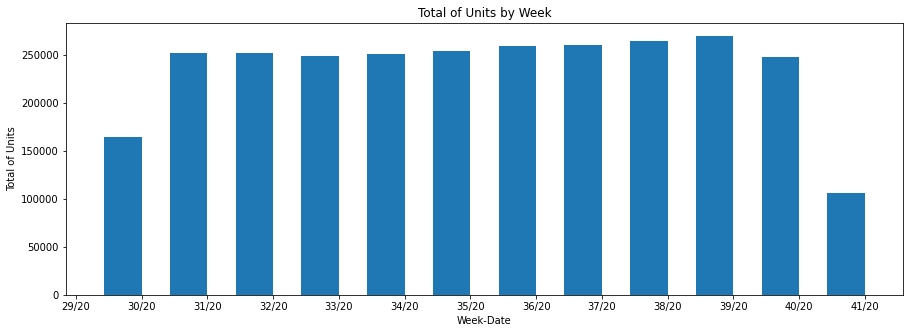

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(unit_per_week.index, unit_per_week.units, 4)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%W/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xlabel('Week-Date')
plt.ylabel('Total of Units')
plt.title('Total of Units by Week')

In [ ]:
# It seems to be very stable.

### ¿Which is the mean price by category on each week (ignore any category with a nan)?

In [ ]:
price_per_week = mercadona_prices.groupby(['category', pd.Grouper(key = 'insert_date', freq = '1W')])['price'].mean()
price_per_week = pd.DataFrame(price_per_week).reset_index()
price_per_week['insert_date'] = price_per_week['insert_date'].dt.strftime('%W/%y')
pd.pivot_table(data = price_per_week, values = 'price', index = 'category', columns = 'insert_date',aggfunc = 'mean').sort_values(by = '40/20', ascending = False).dropna()

insert_date,29/20,30/20,31/20,32/20,33/20,34/20,35/20,36/20,37/20,38/20,39/20,40/20
category,,,,,,,,,,,,
marisco,216.710881,217.95463,216.84918,194.574919,196.043614,196.043614,226.204109,232.758184,231.431687,240.314995,271.015344,282.688342
jamon_serrano,42.57871,42.57871,42.57871,42.57871,42.57871,42.57871,42.57871,42.57871,42.57871,42.57871,43.726202,44.029375
pescado_fresco,34.834623,32.336471,34.97846,35.378144,35.015823,35.689338,33.431997,32.647392,33.970579,34.489986,33.31422,35.841491
fruta,1.853455,1.815055,1.79785,1.801833,4.233826,6.662155,10.619548,10.871064,9.683239,9.752204,9.375933,9.309339
perfume_y_colonia,8.802189,8.833036,8.842707,8.884523,8.786135,8.799244,8.76563,8.720281,8.721056,8.716458,8.699435,8.555095
...,...,...,...,...,...,...,...,...,...,...,...,...
patatas_fritas_y_snacks,1.037713,1.041667,1.0475,1.0475,1.046763,1.0475,1.0475,1.052874,1.051667,1.051667,1.051667,1.051667
melocoton_y_pina,1.039375,1.039375,1.039375,1.035972,1.039375,1.039375,1.039375,1.039375,1.039375,1.039375,1.039375,1.039375
bolleria_envasada,1.04623,1.04623,1.050742,1.077311,1.08217,1.083428,1.070121,1.062095,1.034751,1.04454,1.042661,1.025906


### ¿How many products were added in the last week?

In [ ]:
ad_products = mercadona_prices.groupby(['name', pd.Grouper(key = 'insert_date', freq = '1W')])['id'].count()
ad_products = pd.DataFrame(ad_products).reset_index()
ad_products['insert_date'] = ad_products['insert_date'].dt.strftime('%W/%y')
ad_products = pd.pivot_table(data = ad_products, values = 'id', index = 'name', columns = 'insert_date')
ad_products = ad_products.iloc[:,-2:]
x1 = ad_products['39/20'].dropna()
x2 = ad_products['40/20'].dropna()
x2.value_counts().sum() - x1.value_counts().sum()

83

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe744348-fecc-4b7a-803c-44dba24ecb38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>